## Photometry Cookbook
This notebook will represent a standard cookbook for performing SLUGGS survey photometry on ground-based data.

In [4]:
#standard imports
%matplotlib inline
import seWrapper
from imp import reload
import os
import matplotlib.pyplot as plt
import numpy as np
reload(seWrapper)

<module 'seWrapper' from '/Users/zjennings/astro/sluggs_phot_calibration/seWrapper.py'>

### Steps:
1. Use the aperture correction cookbook to calculate aperture corrections for each filter. 
2. Use the zero-point cookbook to calculate zero-points for each filter. (not ready yet)
3. Use the completeness curve cookbook to calculate completeness curves for each filter. 
4. Combine all photometry into a single catalog file using this notebook.
5. Calculate final zero-points by comparing the color-color distributions of sample foreground star populations with those observed in the data. 

### 1. Calculate the aperture corrections for each  filter.
Standard procedure will be to create an individual aperture correction notebook for each filter. Follow the "aperture_correction_cookbook.ipynb" format. Record the aperture corrections both below and on the google spreadsheet, and commit the notebooks to show work.

In [1]:
#aperture corrections:
g_band_apr_cor = 0.297
r_band_aper_cor = 0.293
i_band_aper_cor = 0.206

### 2. Calculate initial zero-points for each filter. 
For galaxies that overlap with SDSS, we will calculate zero-points with overlapping SDSS photometry. Use the sdss_zero_point_cookbook.ipynb to calculate this.

In [2]:
#zero-points
g_band_zpt = 27.64999962
r_band_zpt = 27.77000046
i_band_zpt = 27.70999908

### 3. Calculate the completeness curves for each filter. 
Re-run photometry with new zero-points used, for convenience sake. Then use the fake_star_notebook to perform fake star photometry. Then use the completeness curve notebook to calculate completeness curves and save the completeness object as a pickle.

### 4. Look up the MW foreground extinction values and note them here.

In [ ]:
g_fg = 
r_fg = 
i_fg = 

### 4. Combine the catalogs using the code below.

In [5]:
se = seWrapper.seCatalog()

In [8]:
se_g = seWrapper.seCatalog()
se_g.create_new_catalog_file('GUSNO_uncorrected.csv',filter='g')
se_r = seWrapper.seCatalog()
se_r.create_new_catalog_file('RUSNO_uncorrected.csv',filter='r')
se_i = seWrapper.seCatalog()
se_i.create_new_catalog_file('IUSNO_uncorrected.csv',filter='i')

In [10]:
se_g.mergeCatalog(se_r)

In [11]:
se_g.mergeCatalog(se_i)

### 5. Select out good sources and apply aperture and FG extinction cuts.  

In [14]:
good = (se_g.mags['g'] < 90) & (se_g.mags['r'] < 90) & (se_g.mags['i'] < 90)

In [17]:
gi = se_g.mags['g'][good] - se_g.mags['i'][good]
ri = se_g.mags['r'][good] - se_g.mags['i'][good]

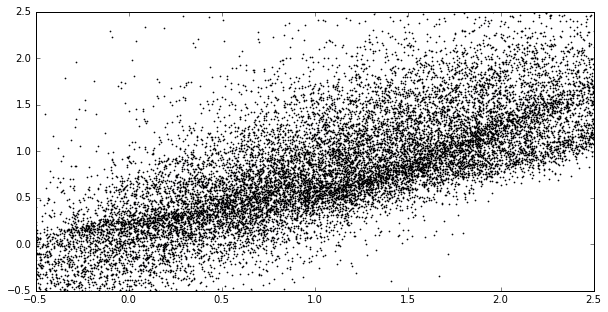

In [19]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_xlim(-0.5,2.5)
ax.set_ylim(-0.5,2.5)
plt.scatter(gi,ri,s=0.5)

In [94]:
directory = 'field_1/'
file = directory+'NGVS_BG_1.G.fits'
os.system("sex -c g.sex " + file)

0

In [116]:
np.sum(se_g.mags['g'] < 99)

212763

In [66]:
good = (se.mags['g'] < 90) & (se.mags['g_noback'] < 90)

In [67]:
diffs = se.mags['g'][good] - se.mags['g_noback'][good]

In [50]:
foo = {'foo_1':0.0,'foo_2':1.0,'foo_3':2.0}

(-2, 2)

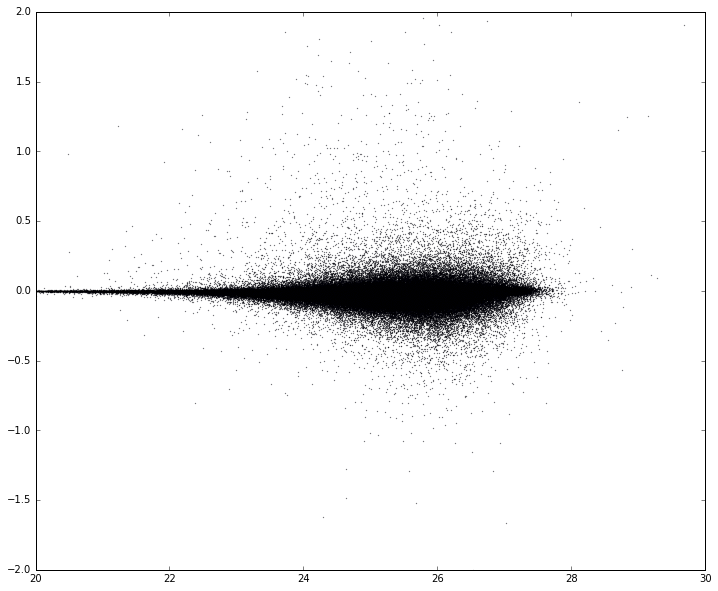

In [72]:
fig,ax = plt.subplots(figsize=(12,10))
ax.scatter(se.mags['g'][good],diffs,s=0.05)
ax.set_xlim(20,30)
ax.set_ylim(-2,2)

In [73]:
foo = dict()

In [78]:
foo['a'] = 0.0
foo['b'] = 1.0
foo['c'] = 2.0

In [88]:
keys = foo.keys()
for i in range(len(list(keys))):
    print(foo[list(keys)[i]])

0.0
1.0
2.0


In [ ]:
for i in range(len(list(keys))):
    truth[:,i] = self.mags[list(keys)[i]] < 99

In [117]:
good_sources = (se_g.mags['g'] < 99) & \
        (se_g.mags['r'] < 99) & \
        (se_g.mags['i'] < 99) & \
        (se_g.flags['g'] < 1) & \
        (se_g.flags['r'] < 1) &\
        (se_g.flags['i'] < 1)

In [119]:
np.sum(good_sources)

80791

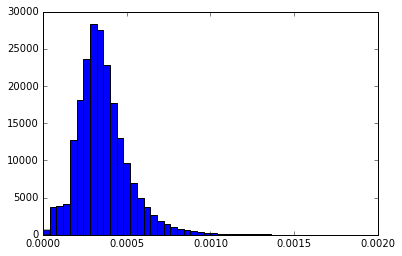

In [134]:
hist = plt.hist(se_g.fwhm['g'],range=(0,0.002),bins=50)